In [132]:
#!pip install chart-studio
#!pip install swifter --user

  Using cached swifter-0.305-py3-none-any.whl (9.7 kB)


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
py.offline.init_notebook_mode(connected=True)
from math import floor
from plotly import tools
from plotly.graph_objs import *
from IPython.display import display
#from chart_studio.widgets import GraphWidget
print('Packages Imported Successfully!')

Packages Imported Successfully!


In [134]:
imdb = pd.read_csv('C:/Users/Anda/.kaggle/edsa-recommender-system-predict/imdb_data.csv')
train = pd.read_csv('C:/Users/Anda/.kaggle/edsa-recommender-system-predict/train.csv')
movies = pd.read_csv('C:/Users/Anda/.kaggle/edsa-recommender-system-predict/movies.csv')
g_tags = pd.read_csv('C:/Users/Anda/.kaggle/edsa-recommender-system-predict/genome_tags.csv')
g_scores = pd.read_csv('C:/Users/Anda/.kaggle/edsa-recommender-system-predict/genome_scores.csv')
tags = pd.read_csv('C:/Users/Anda/.kaggle/edsa-recommender-system-predict/tags.csv')
print('Data Successfully imported!')

Data Successfully imported!


In [135]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [137]:
tad_df = tags.merge((g_scores.merge(g_tags, on='tagId')), on='movieId').head()

MemoryError: 

In [88]:
df = train.merge(imdb.merge(movies, on ='movieId'), on = 'movieId')
df.head()

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords,title,genres
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [118]:
df.isnull().sum()


userId                 0
movieId                0
rating                 0
timestamp              0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
title                  0
genres                 0
dtype: int64

In [89]:
# Function to get the genre ratings
# Function to get the genre ratings
def get_genre_ratings(train, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = train[train['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings

# Calculate the average rating of romance and scifi movies
genre_ratings = get_genre_ratings(train, movies, ['Romance', 'Sci-Fi', 'Animation', 'Adventure', 'Comedy','Fantasy', 'Action'], ['avg_romance_rating', 'avg_scifi_rating', 'avg_anim_rating', 'avg_adv_rating', 'avg_com_rating', 'avg_fant_rating', 'avg_act_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating,avg_anim_rating,avg_adv_rating,avg_com_rating,avg_fant_rating,avg_act_rating
1,3.83,4.50,NaN,4.67,3.79,3.50,5.00
2,3.03,3.86,2.88,3.85,3.08,3.68,3.45
3,3.52,3.64,3.97,3.68,3.41,3.66,3.62
4,3.25,2.94,3.67,3.07,3.50,2.92,2.93
5,3.83,4.00,4.00,4.00,3.75,3.75,3.14


In [90]:
# calculate the average movie duration
round(df['runtime'].mean(),2)

116.1

In [93]:
# sort the DataFrame by duration to find the shortest and longest movies
df.sort_values('runtime')

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords,title,genres
9611382,135632,117909,4.0,1422617305,Fred Ott,Edwin S. Porter,1.0,NaN,NaN,The Kiss (1900),Romance
9631952,154484,82362,3.5,1542451698,Georges Méliès,Georges Méliès,1.0,NaN,NaN,"Pyramid of Triboulet, The (La pyramide de Trib...",Fantasy
9631951,89538,82362,4.5,1291897185,Georges Méliès,Georges Méliès,1.0,NaN,NaN,"Pyramid of Triboulet, The (La pyramide de Trib...",Fantasy
9625972,92235,129851,0.5,1453341832,William K.L. Dickson,William K.L. Dickson,1.0,NaN,NaN,Dickson Greeting (1891),(no genres listed)
9625971,67248,129851,3.0,1426144489,William K.L. Dickson,William K.L. Dickson,1.0,NaN,NaN,Dickson Greeting (1891),(no genres listed)
...,...,...,...,...,...,...,...,...,...,...,...
9633021,39415,116772,2.5,1415769839,NaN,NaN,NaN,NaN,NaN,The Hanoi Hilton (1987),Drama|War
9633023,87116,52773,2.0,1310136122,Jeremy London|Katheryn Winnick|Elisa Donovan|M...,Julian Hoxter,NaN,"$1,400,000",central park|female exhibitionist|husband and ...,Kiss Me Again (2006),Drama|Romance
9633025,72315,31797,3.0,1504095103,NaN,NaN,NaN,NaN,NaN,White Banners (1938),Drama
9633027,78784,96316,3.5,1345995049,Siiri Angerkoski|Selma Miettinen|Varma Lahtine...,Aulikki Oksanen,NaN,NaN,janitor|income|housing problem|social problem,Aliisa (1970),Drama


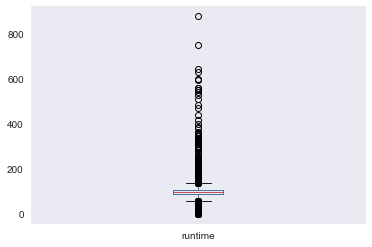

In [66]:
# use a box plot to display that same data
imdb['runtime'].plot(kind='box')

In [94]:
# count how many movies have each of the content ratings
df[['genres','title']].groupby('genres').count()

,title
genres,
(no genres listed),408
Action,14703
Action|Adventure,57141
Action|Adventure|Animation,2145
Action|Adventure|Animation|Children,2462
...,...
Thriller|War,118
Thriller|Western,19
War,1466


Text(0, 0.5, 'Title Count')

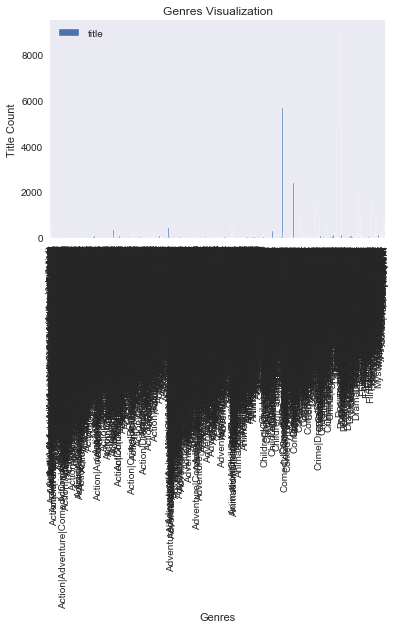

In [80]:
# use a visualization to display that same data, including a title and x and y labels
movies[['genres','title']].groupby('genres').count().plot(kind='bar', title='Genres Visualization')
plt.xlabel('Genres')
plt.ylabel('Title Count')

In [95]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
print('Avg. star rating for movies 2 hours or longer: ', round(df[df['runtime'] >= 120]['rating'].mean(),2), 
 '\nAvg. star rating for movies shorter than 2 hours: ', round(df[df['runtime'] < 120]['rating'].mean(),2)

Avg. star rating for movies 2 hours or longer:  3.6551360880757966 
Avg. star rating for movies shorter than 2 hours:  3.381287146621076


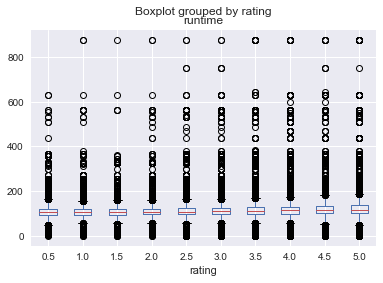

In [96]:
# use a visualization to detect whether there is a relationship between duration and star rating
df.boxplot(column='runtime', by='rating');

In [97]:
# calculate the average duration for each genre
df[['runtime','genres']].groupby('genres').mean()

,runtime
genres,
(no genres listed),59.637324
Action,103.348967
Action|Adventure,106.240595
Action|Adventure|Animation,102.316084
Action|Adventure|Animation|Children,92.892770
...,...
Thriller|War,83.000000
Thriller|Western,95.000000
War,99.593333


In [ ]:
# visualize the relationship between content rating and duration
movies.boxplot(column=’duration’, by=’content_rating’)

In [104]:
# determine the top rated movie (by star rating) for each genre
df.sort_values('rating', ascending=False).groupby('genres')['title','rating'].first()

,title,rating
genres,,
(no genres listed),Women Aren't Funny (2014),5.0
Action,Under Siege 2: Dark Territory (1995),5.0
Action|Adventure,Raiders of the Lost Ark (Indiana Jones and the...,5.0
Action|Adventure|Animation,How to Train Your Dragon 2 (2014),5.0
Action|Adventure|Animation|Children,Brave (2012),5.0
...,...,...
Thriller|War,Essential Killing (2010),5.0
Thriller|Western,Sweetwater (2013),4.5
War,Pork Chop Hill (1959),5.0


In [106]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
result = df[df['title'].isin(df[df.duplicated(['title'])]['title'])]
result.sort_values('title')

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords,title,genres
9532427,156067,51372,0.5,1324950206,Elaine Paige|John Mills|Ken Page|Rosemarie For...,T.S. Eliot,120.0,NaN,ballet|aging|kidnapping|magician,"""Great Performances"" Cats (1998)",Musical
9532422,28522,51372,2.5,1565670939,Elaine Paige|John Mills|Ken Page|Rosemarie For...,T.S. Eliot,120.0,NaN,ballet|aging|kidnapping|magician,"""Great Performances"" Cats (1998)",Musical
9532423,22836,51372,5.0,1337975563,Elaine Paige|John Mills|Ken Page|Rosemarie For...,T.S. Eliot,120.0,NaN,ballet|aging|kidnapping|magician,"""Great Performances"" Cats (1998)",Musical
9532424,39162,51372,3.5,1536525615,Elaine Paige|John Mills|Ken Page|Rosemarie For...,T.S. Eliot,120.0,NaN,ballet|aging|kidnapping|magician,"""Great Performances"" Cats (1998)",Musical
9532425,47571,51372,0.5,1272753656,Elaine Paige|John Mills|Ken Page|Rosemarie For...,T.S. Eliot,120.0,NaN,ballet|aging|kidnapping|magician,"""Great Performances"" Cats (1998)",Musical
...,...,...,...,...,...,...,...,...,...,...,...
9609333,72315,130640,2.0,1450164194,Satomi Ishihara|Kôji Seto|Ryôsei Tayama|Tsutom...,Kôji Suzuki,96.0,NaN,entering tv screen|screaming woman|screaming i...,貞子3D (2012),Horror
9609332,71897,130640,4.0,1434900243,Satomi Ishihara|Kôji Seto|Ryôsei Tayama|Tsutom...,Kôji Suzuki,96.0,NaN,entering tv screen|screaming woman|screaming i...,貞子3D (2012),Horror
9609331,71265,130640,4.0,1530232596,Satomi Ishihara|Kôji Seto|Ryôsei Tayama|Tsutom...,Kôji Suzuki,96.0,NaN,entering tv screen|screaming woman|screaming i...,貞子3D (2012),Horror
9609330,73268,130640,1.0,1475287379,Satomi Ishihara|Kôji Seto|Ryôsei Tayama|Tsutom...,Kôji Suzuki,96.0,NaN,entering tv screen|screaming woman|screaming i...,貞子3D (2012),Horror


In [110]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies
genres = df['genres'].value_counts()[df['genres'].value_counts() > 10].index
df[df['genres'].isin(genres)].groupby('genres')['rating'].mean()

genres
(no genres listed)                     3.123775
Action                                 2.908760
Action|Adventure                       3.705929
Action|Adventure|Animation             3.718415
Action|Adventure|Animation|Children    3.504468
                                         ...   
Thriller|War                           3.334746
Thriller|Western                       3.078947
War                                    3.646999
War|Western                            3.294118
Western                                3.552420
Name: rating, Length: 1091, dtype: float64

In [116]:
df.head()

,userId,movieId,rating,timestamp,title_cast,director,runtime,budget,plot_keywords,title,genres
0,5163,57669,4.0,1518349992,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008),Comedy|Crime|Drama|Thriller


### Research Question 1 : Which year has the highest release of movies?

tagId
1124    13816
1125    13816
1126    13816
1127    13816
1128    13816
Name: movieId, dtype: int64


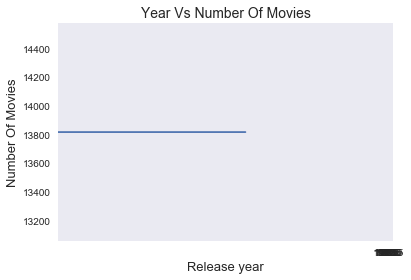

In [120]:
#¶
# make group for each year and count the number of movies in each year 
data=g_scores.groupby('tagId').count()['movieId']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
g_scores.groupby('tagId').count()['movieId'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

### Research Question 2 : Which Movie Has The Highest Or Lowest Budget?

In [124]:
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['title'][min_index])
    return pd.concat([high,low],axis = 1)

In [125]:
#find the movie with highest and lowest budget.
#use 'find_minmax' function which i made earlier.
#make sure that movie with budget zero didn't affect the result.
#so change the zero into NAN in budget column.
df['budget'] = df['budget'].replace(0,np.NAN)
find_minmax('budget')

TypeError: reduction operation 'argmin' not allowed for this dtype

**need to conver 'budget' to float**

In [ ]:
#make a plot which contain top 10 highest budget movies.
#sort the 'budget' column in decending order and store it in the new dataframe.
info = pd.DataFrame(reader['budget'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))

#extract the top 10 budget movies data from the list and dataframe.
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")


### Research Question 3 : Movie with Longest And Shortest Runtime?

In [126]:

#find the movie with longest and shortest runtime.
#use 'find_minmax' function which i made earlier by passsing 'runtime' as argument.
#it can't be possible a movie with zero runtime,but dataset contain some data like this.
#so update zero with NAN in runtime column.
df['runtime'] = df['runtime'].replace(0,np.NAN)
find_minmax('runtime')


Movie Which Has Highest runtime :  Taken (2002)
Movie Which Has Lowest runtime  :  Stille Nacht I: Dramolet (1988)


,8201493,9438402
userId,38627,124638
movieId,123288,126050
rating,5,2.5
timestamp,1488354377,1562221491
title_cast,Dakota Fanning|Matt Frewer|Emily Bergl|Heather...,NaN
director,Dakota Fanning,Stephen Quay
runtime,877,1
budget,"$40,000,000",NaN
plot_keywords,roswell new mexico|unidentified flying object|...,magnet|doll|spoon|moth
title,Taken (2002),Stille Nacht I: Dramolet (1988)


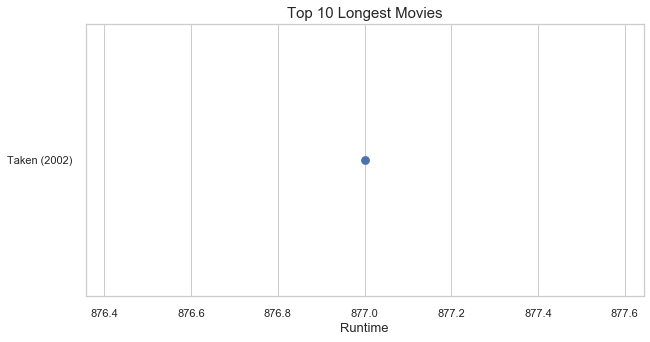

In [127]:
#top 10 Movies With Longest runtime
#sort the 'runtime' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['runtime'].sort_values(ascending = False))
info['title'] = df['title']
data = list(map(str,(info['title'])))

#extract the top 10 longest duraton movies data from the list and dataframe.
x = list(data[:10])
y = list(info['runtime'][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

### Research Question 4 : Movie with Highest And Lowest Ratings?

In [ ]:
#use 'find_minmax' function which i made earlier by passsing 'Vote_average' as argument.
find_minmax('vote_average')

In [129]:
#top 10 highets rated movies.
#sort the 'vote_average' column in decending order and store it in the new dataframe.
info = pd.DataFrame(df['rating'].count().mean().sort_values(ascending = False))
info['title'] = df['title']
data = list(map(str,(info['title'])))

##extract the top 10 highly rated movies data from the list and dataframe.
x = list(data[:10])
y = list(info[df['rating'].count().mean()][:10])

#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Highest Rated Movies",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
#setup the stylesheet
sns.set_style("darkgrid")

AttributeError: 'numpy.float64' object has no attribute 'sort_values'

### Research Question 5: Average Runtime Of Movies From Year To Year?

In [ ]:
#how the runtime of the movies differ year to year.

#make the group of the data according to their release_year and find the mean  related to this and plot.
reader.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

In [ ]:
#how does vote average(ratings) change according to the release year.
#make a scatter plot using 'regplot' between 'year' and 'vote average'.
ax = sns.regplot(x=reader['release_year'], y=reader['vote_average'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Release Year Vs Vote Average",fontsize=13)
ax.set_xlabel("Release Year",fontsize=12)
ax.set_ylabel("Vote Average",fontsize=12)

#set the figure size and print the correlation between them.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
print("Correlation Between Release Year And Vote Average : ",data_corr.loc['release_year','vote_average'])

### Research Question 6: Which Genre Has The Highest Release Of Movies?

In [130]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

MemoryError: 

In [ ]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5, 5))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()

In [ ]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

words = dict()
for s in genre_count:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
f, ax = plt.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Reasearch Question 7: Most Frequent Actor?

In [ ]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_flims = count_genre('cast')

#plot the barh plot.
count_actor_flims.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Most Frequent Actor",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

### Research Question 8 : Top 20 Director Who Directs Maximum Movies?

In [ ]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies directed by each diretor.
count_director_movies = count_genre('director')

#plot a barh graph
count_director_movies.iloc[:20].plot(kind='bar',figsize=(13,6),fontsize=12)

#setup the title and the labels 
plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

### Research Question 9 : Most Popular Keyword?

In [ ]:
keywords = count_genre('keywords')
i = 0
keyword_occurences = []
for p in keywords.index:
    keyword_occurences.append([p, keywords[i]])
    i = i+1

In [ ]:
#_____________________________________________
# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')